In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm

In [4]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<ipython-input-8-584f83373cc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

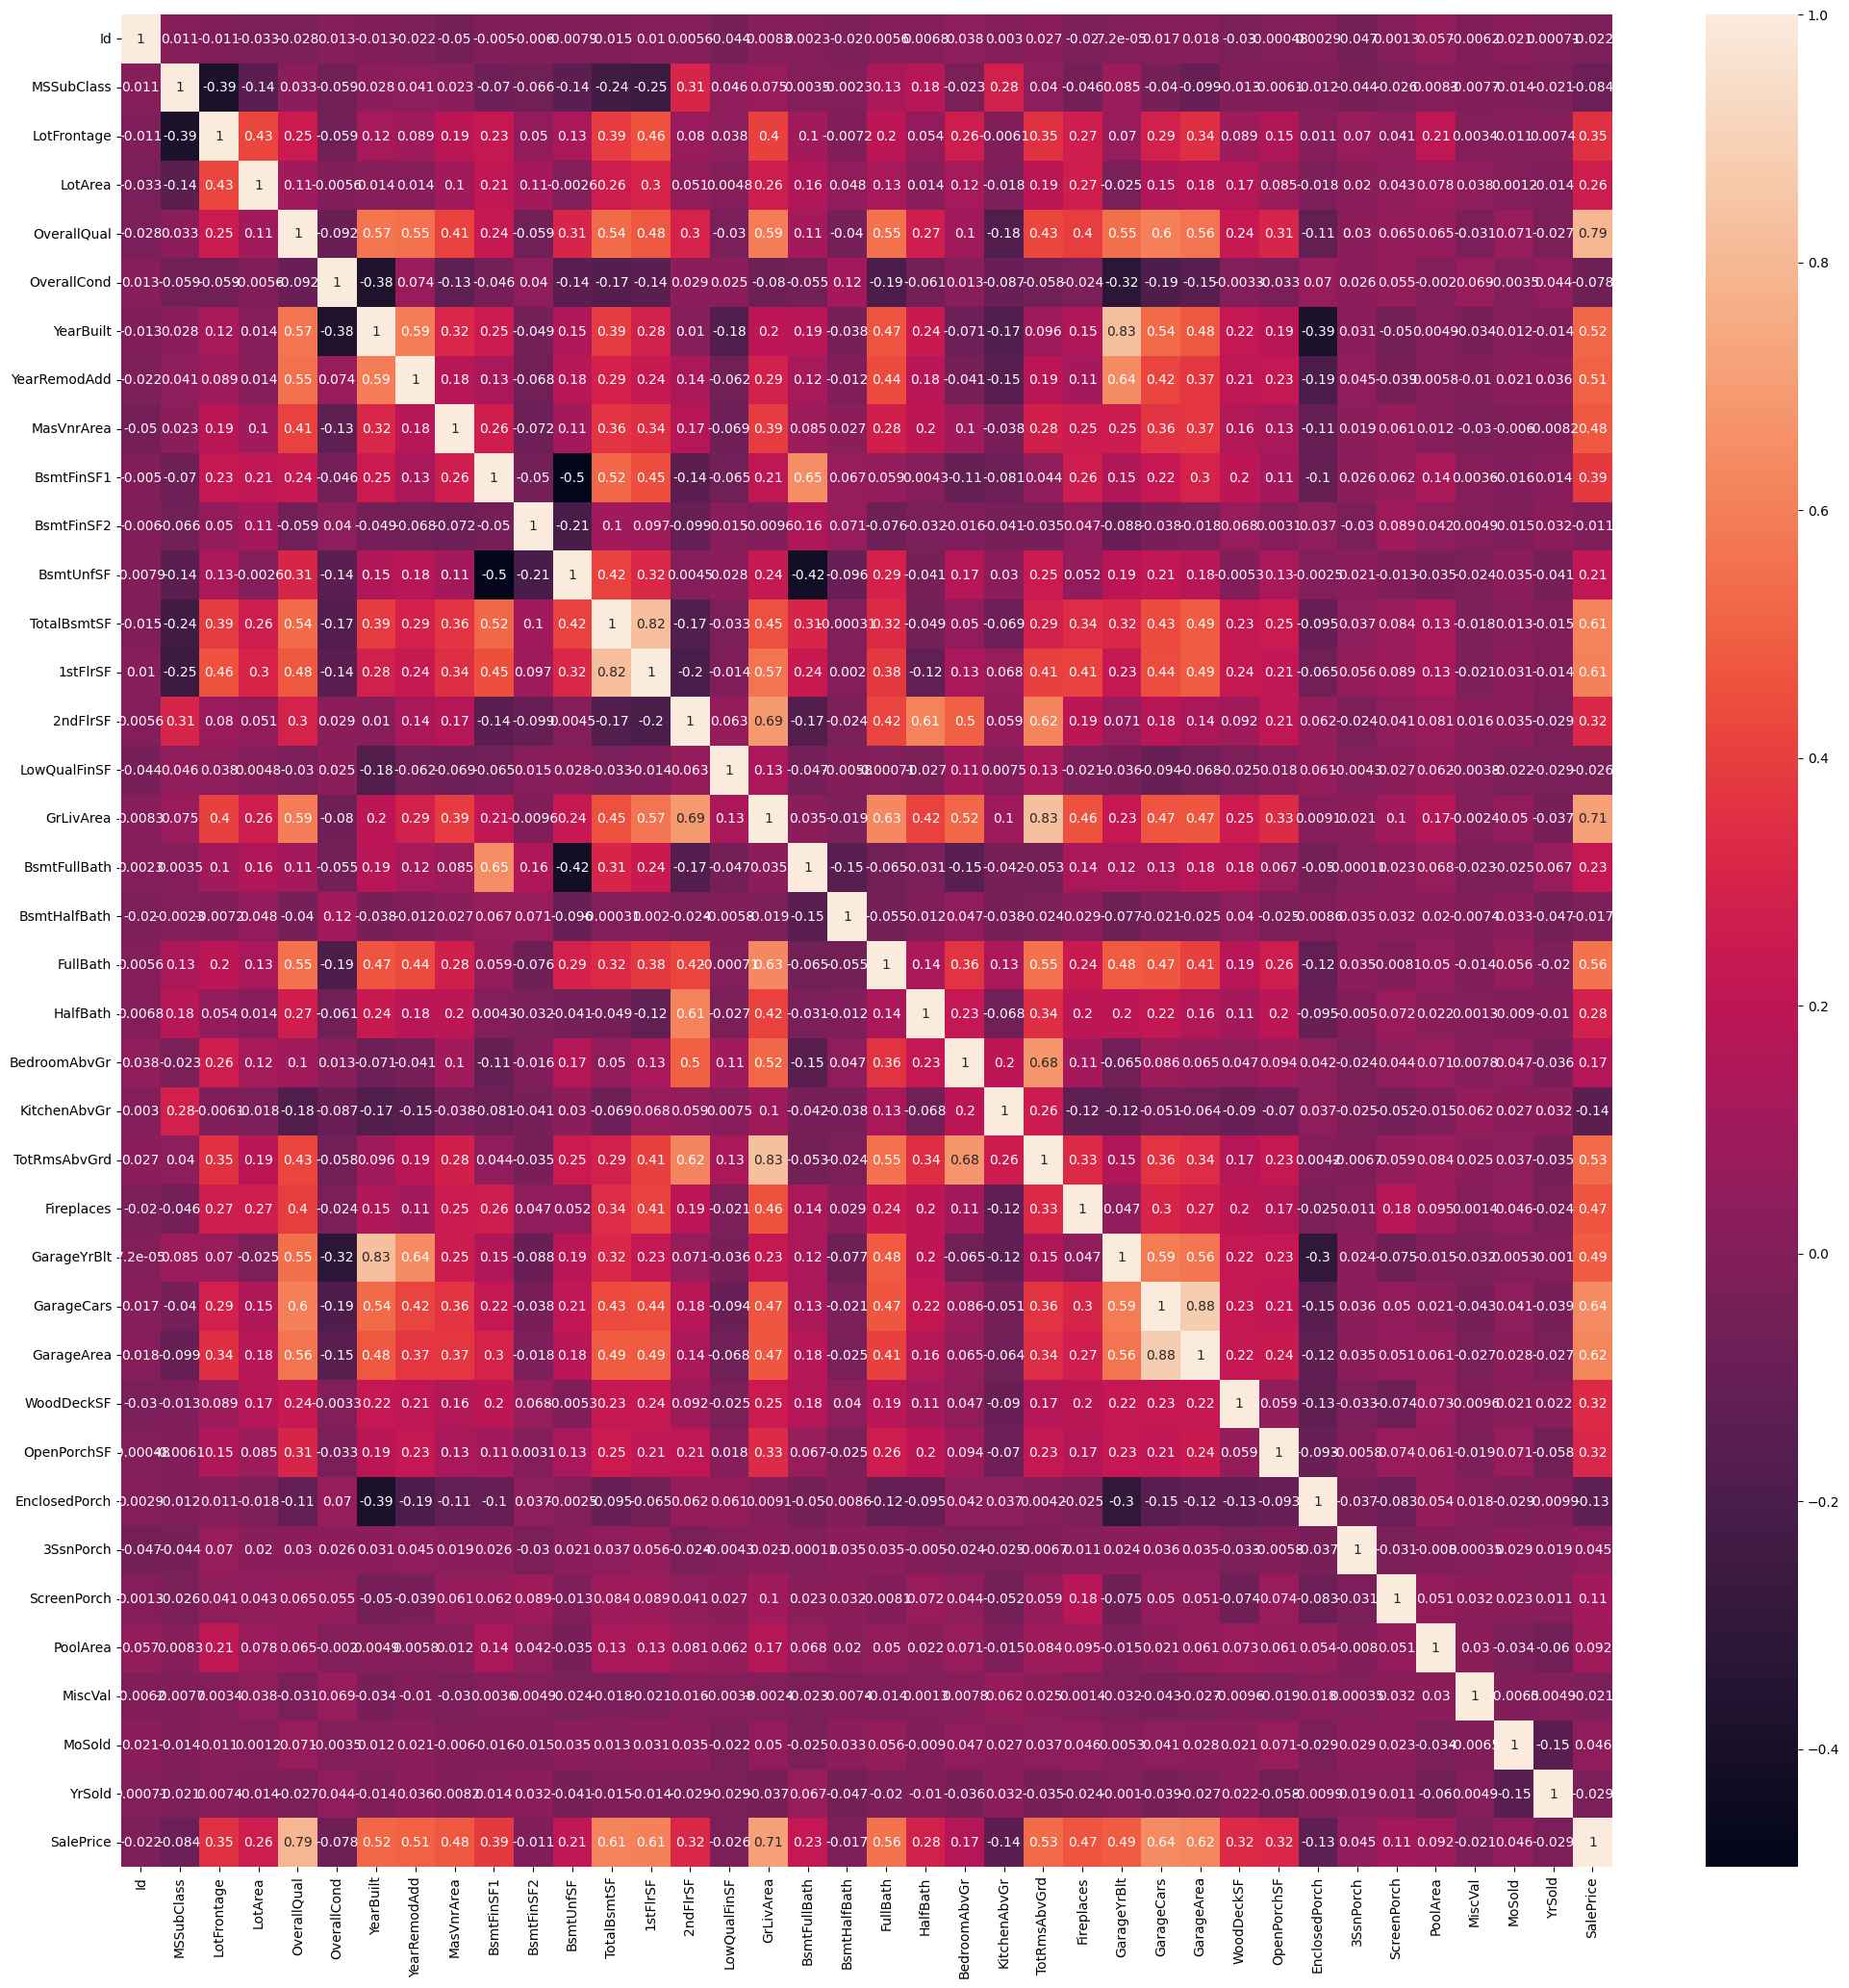

In [8]:
corr = df.corr()
plt.subplots(figsize = (25,25))
sns.heatmap(corr, annot = True)

<Axes: >

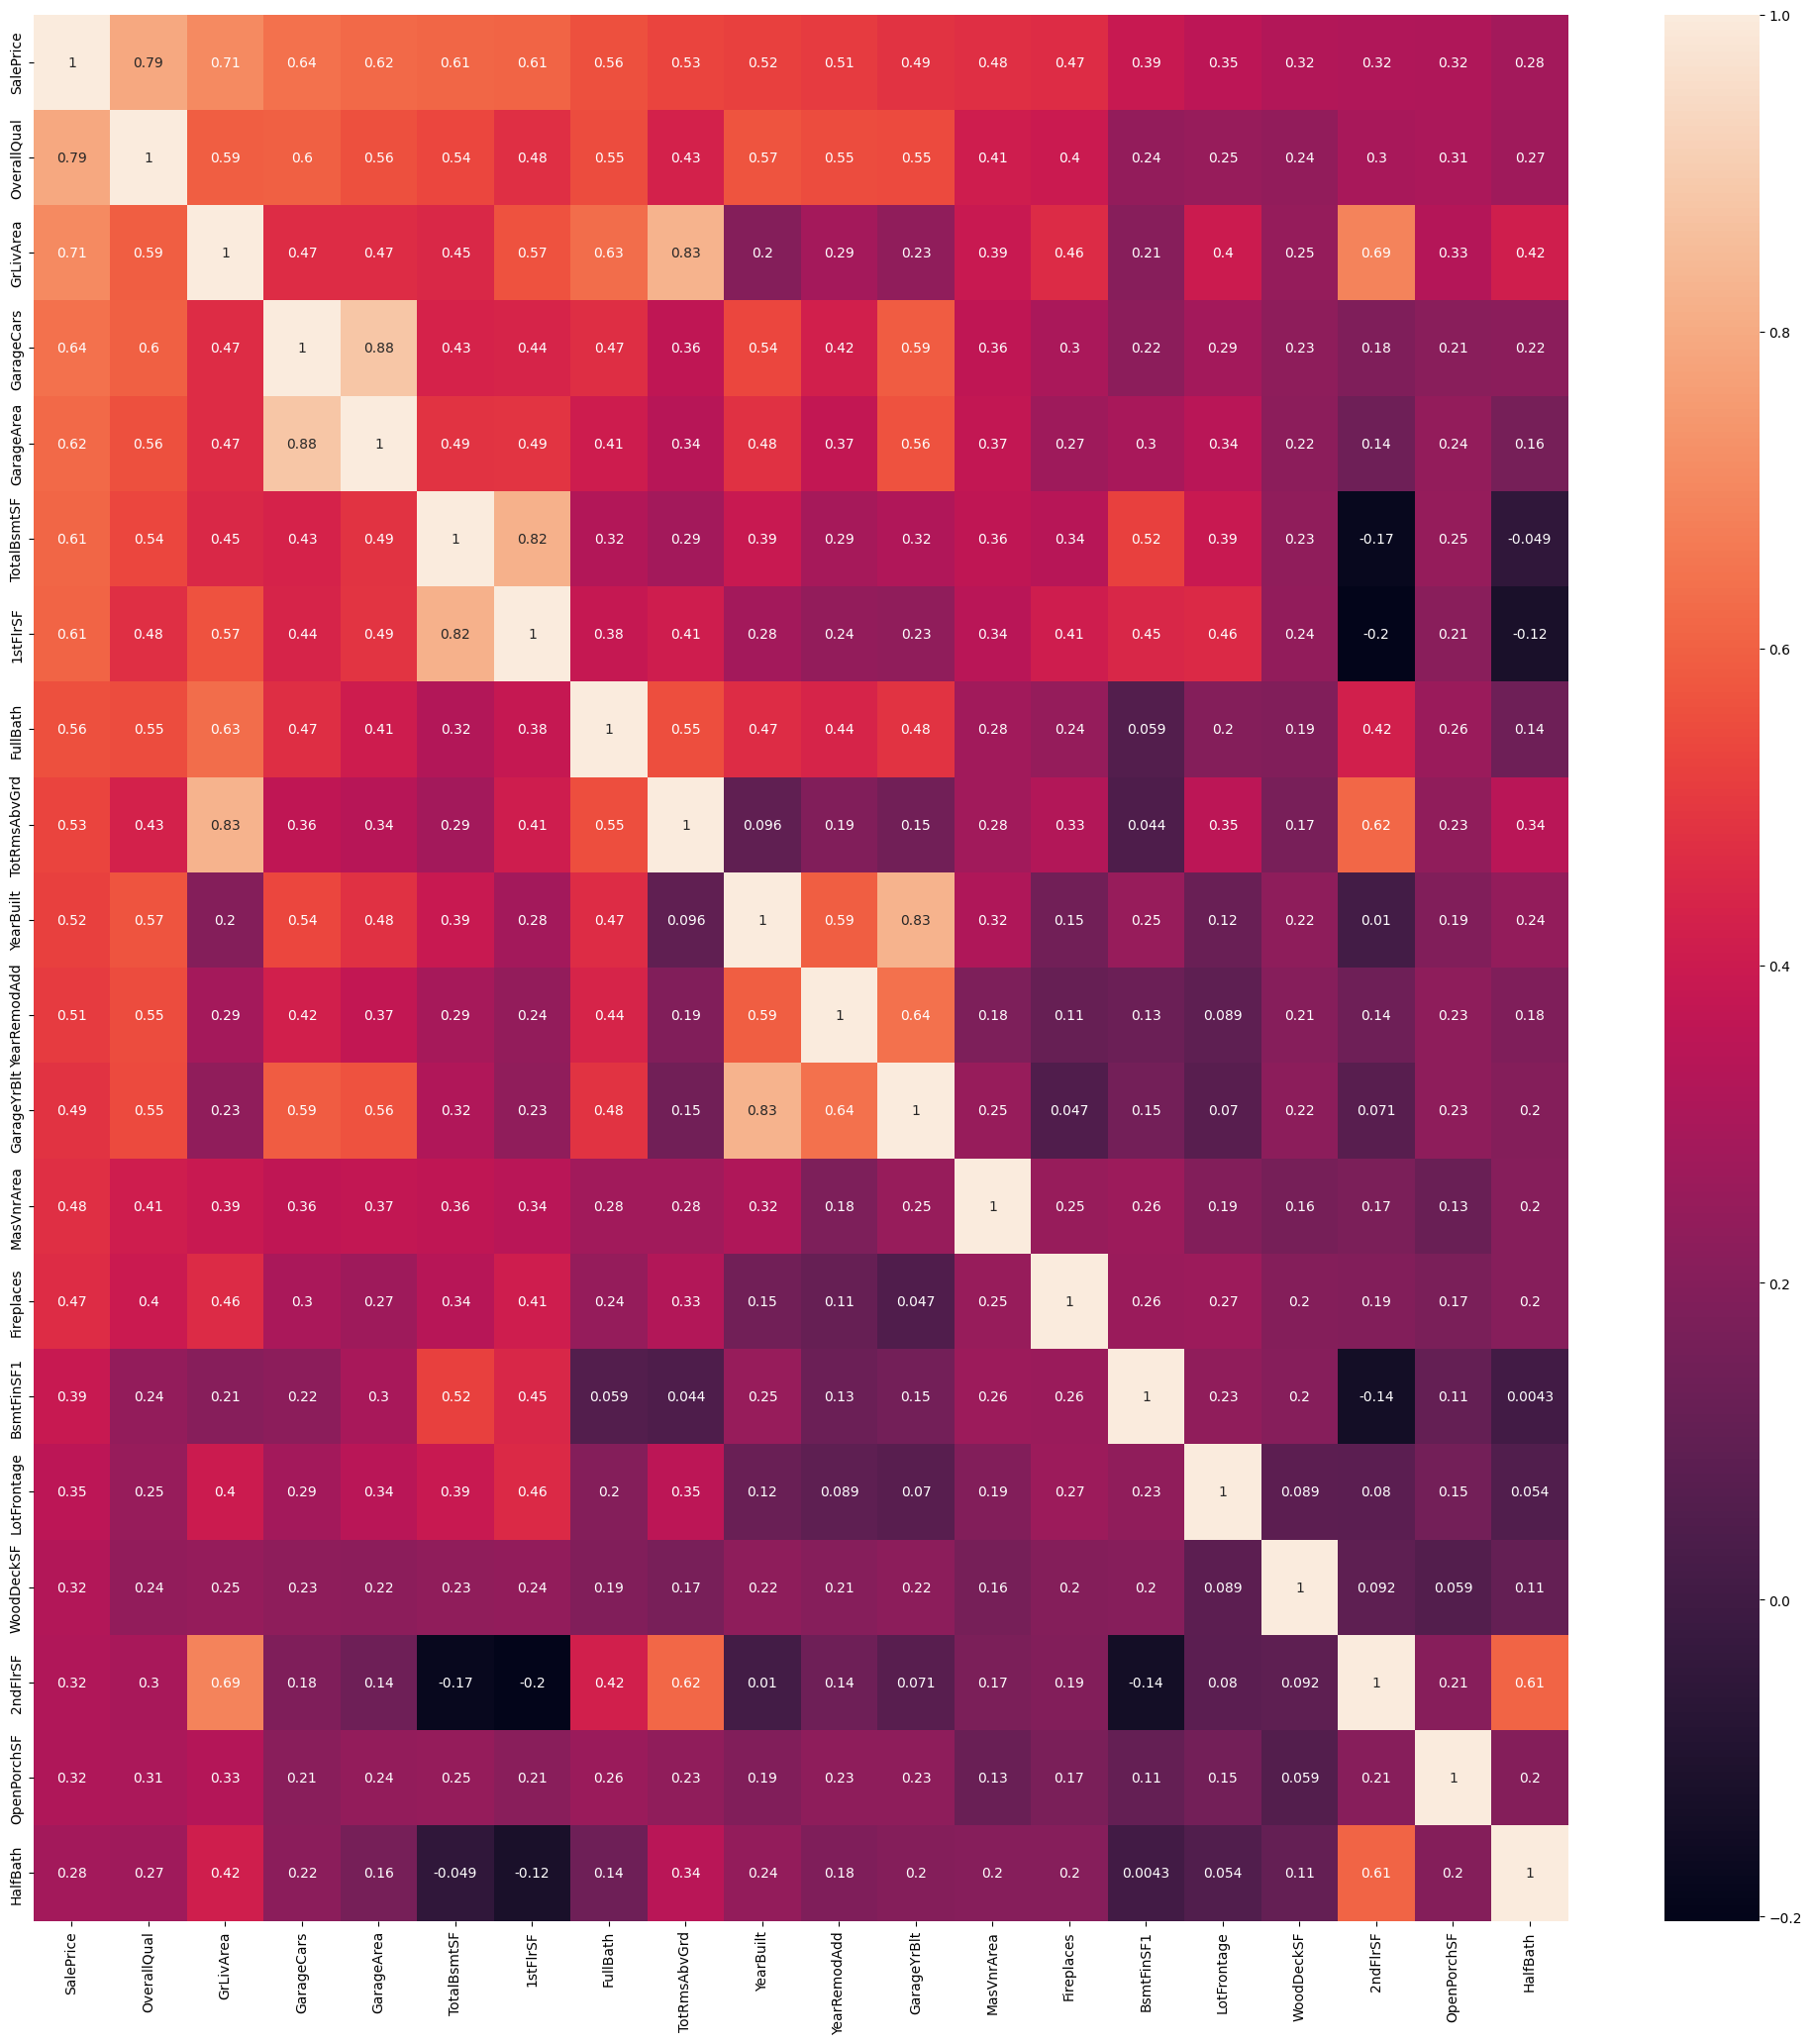

In [10]:
corr_cols = corr['SalePrice'].sort_values(ascending = False).head(10).index
corr_SalePrice = df[corr_cols].corr()
plt.subplots(figsize=(25,25))
sns.heatmap(corr_SalePrice, annot = True)

IndexError: ignored

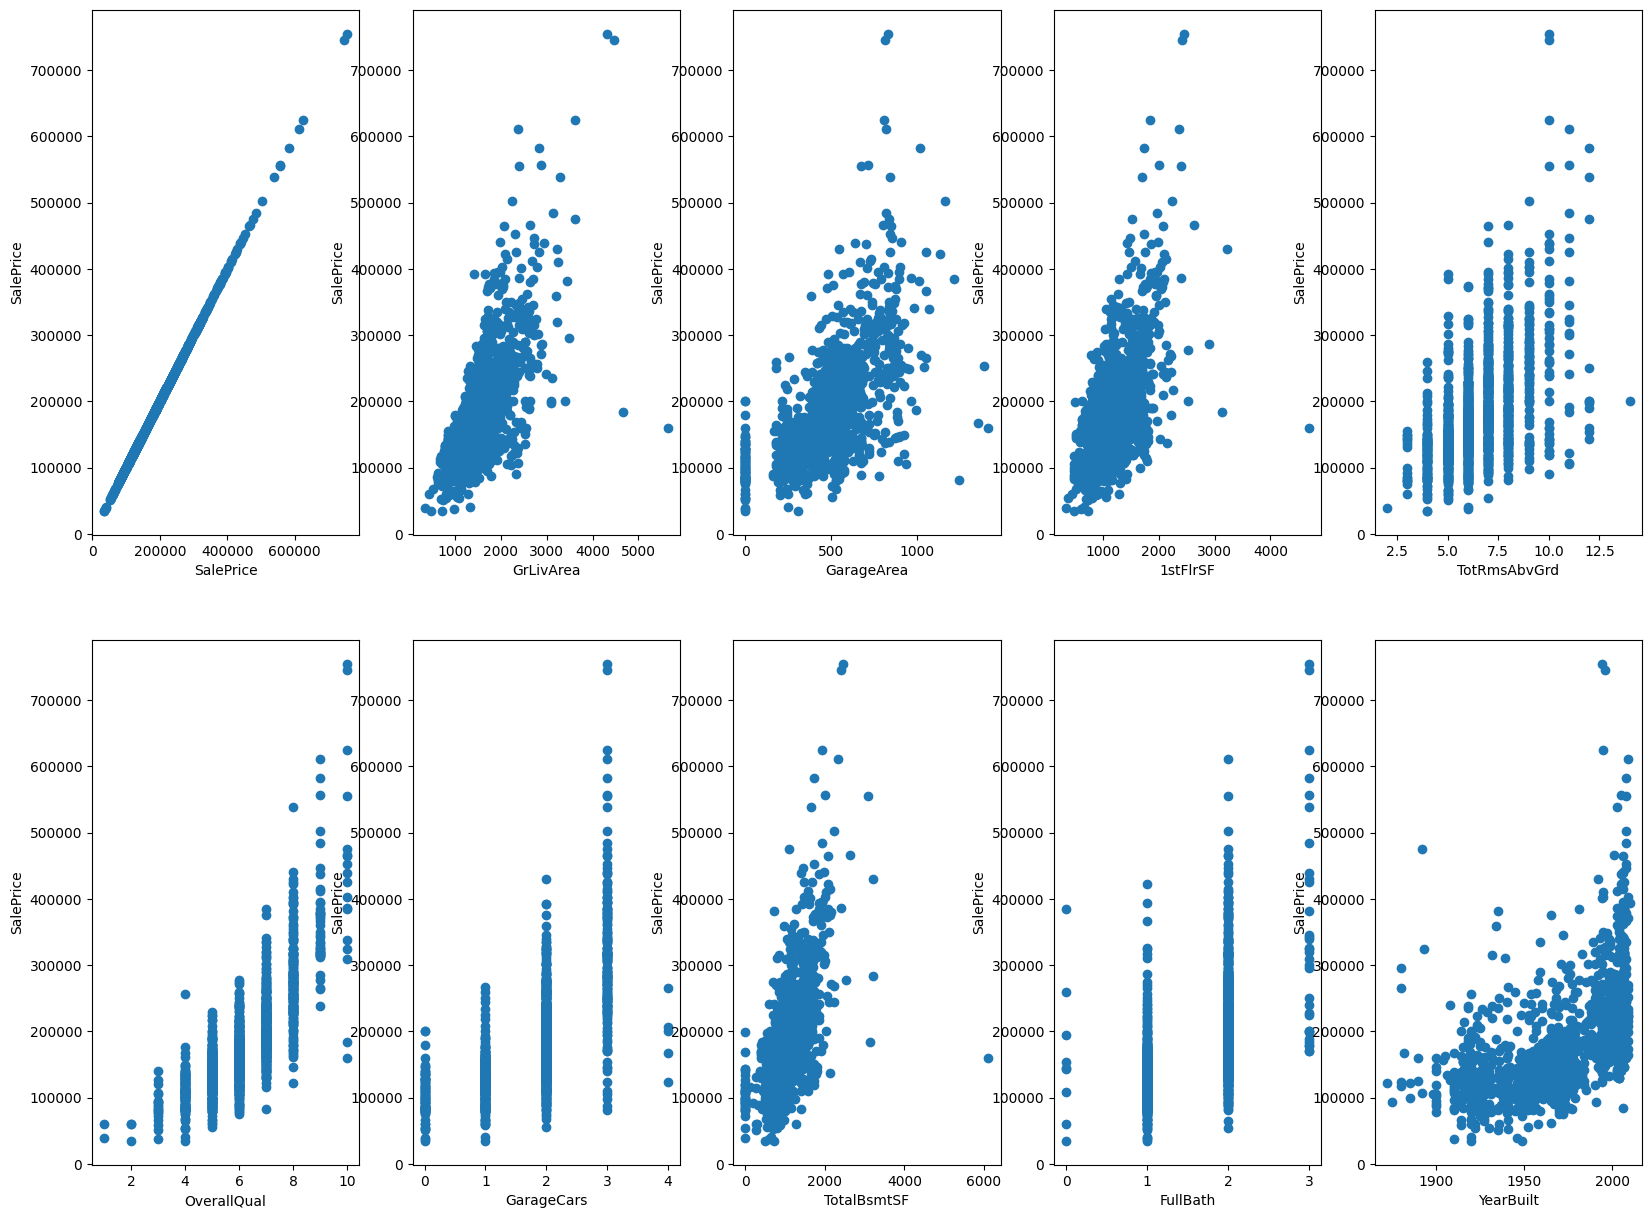

In [12]:
fig, axs = plt.subplots(2,5,figsize = (20,15))
x,y = 0,0
for col in corr_cols:
  axs[x,y].scatter(x=df[col], y = df['SalePrice'])
  axs[x,y].set_xlabel(col)
  axs[x,y].set_ylabel('SalePrice')
  x+=1
  if x == 2:
    x = 0
    y += 1

In [15]:
total = df.isnull().sum().sort_values(ascending = False)
pcg = (total/df.isnull().count()).sort_values(ascending = False)
miss_val = pd.concat([total, pcg], axis = 1, keys = ['Total','Percentage'])
miss_val.head(20)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [16]:
drop_col = miss_val[miss_val['Total'] > 1].index
df.drop(drop_col, axis = 1, inplace = True)
df.dropna(subset = ['Electrical'], how = 'any', axis = 0, inplace = True)

In [18]:
(Q1,Q3) = np.log(df['SalePrice']).quantile([.25, .75])
IQR = Q3-Q1
outlier = df[(np.log(df['SalePrice']) < Q1-(1.5 * IQR)) | (np.log(df['SalePrice']) > Q1 + (1.5*IQR))]
df = df.drop(outlier.index).reset_index(drop = True)

In [24]:
from scipy.stats import chi2
def mahalanobis(data):
  x_mu = data - np.mean(data)
  inv_con = np.linalg.inv(np.cov(data.values.T))
  mah = np.dot(np.dot(x_mu, inv_con), x_mu.T)
  return mah.diagonal()

In [26]:
df['mahalanobis'] = mahalanobis(df[['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','GrLivArea','TotalBsmtSF']])
df['chi-square'] = chi2.rvs(df['mahalanobis'])
df[['OverallQual','GarageCars','FullBath','TotRmsAbvGrd','GrLivArea','TotalBsmtSF']].head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,GrLivArea,TotalBsmtSF
0,7,2,2,8,1710,856
1,6,2,2,6,1262,1262
2,7,2,2,6,1786,920
3,7,3,1,7,1717,756
4,8,3,2,9,2198,1145


In [27]:
from scipy.stats import norm
from scipy import stats

<ipython-input-29-215f30de5595>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GrLivArea'], fit = norm)


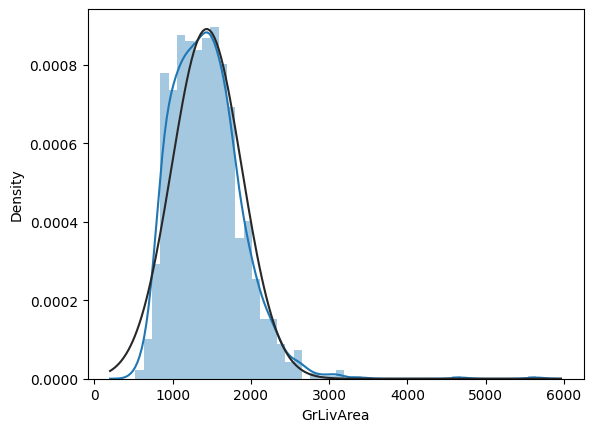

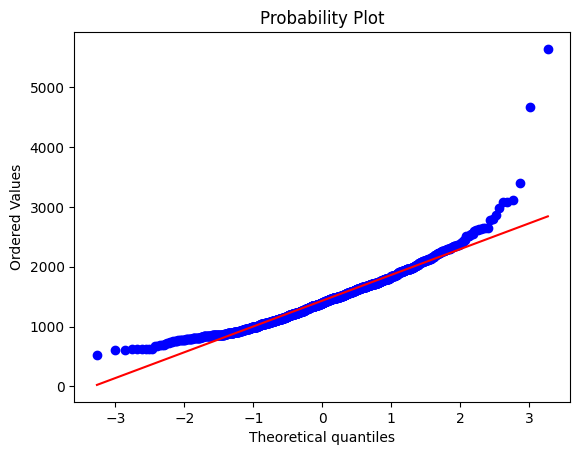

In [29]:
sns.distplot(df['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot = plt)

<ipython-input-30-2fcdd2d8a201>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GrLivArea'], fit = norm)


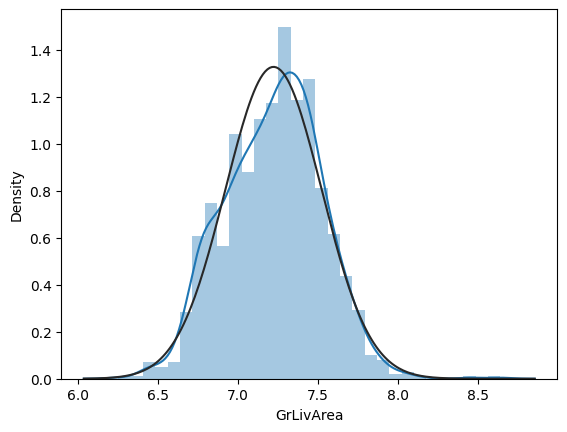

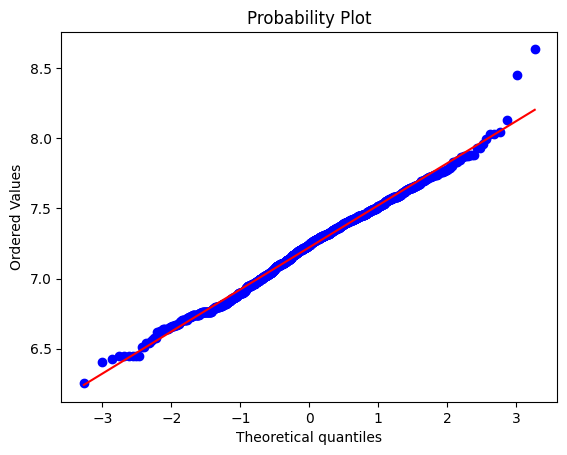

In [30]:
df['GrLivArea'] = np.log(df['GrLivArea'])
sns.distplot(df['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot = plt)

In [31]:
df_final = pd.get_dummies(df)
df_final.sort_index(axis = 1, inplace = True)
df_final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinSF1,...,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,chi-square,mahalanobis
0,856,854,0,3,1,0,0,0,0,706,...,8,856,1,0,0,2003,2003,2008,7.930698,3.069959
1,1262,0,0,3,1,0,0,0,0,978,...,6,1262,1,0,298,1976,1976,2007,1.355755,2.986547
2,920,866,0,3,1,0,0,0,0,486,...,6,920,1,0,0,2001,2002,2008,3.247396,3.997306
3,961,756,0,3,1,0,0,0,0,216,...,7,756,1,0,0,1915,1970,2006,19.405330,11.455154
4,1145,1053,0,4,1,0,0,0,0,655,...,9,1145,1,0,192,2000,2000,2008,2.328903,7.532793


In [33]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['Id', 'mahalanobis', 'chi-square', 'SalePrice'], axis =1)
Y = df_final['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =10)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

print('Linear Regression')
print('RMSE:', np.sqrt(mean_squared_error( Y_test, Y_pred_lr)))
print('MAE:', mean_absolute_error(Y_test, Y_pred_lr))
print('R2:', r2_score(Y_test, Y_pred_lr)*100)

Linear Regression
RMSE: 18149.118081430915
MAE: 12519.632183471907
R2: 84.73465049078752


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

print('Logistic Regression')
print('RMSE:', np.sqrt(mean_squared_error( Y_test, Y_pred_lr)))
print('MAE:', mean_absolute_error(Y_test, Y_pred_lr))
print('R2:', r2_score(Y_test, Y_pred_lr)*100)

Logistic Regression
RMSE: 35521.08551493793
MAE: 27018.53307392996
R2: 41.525279026237925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr = RidgeCV()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

print('RidgeCV')
print('RMSE:', np.sqrt(mean_squared_error( Y_test, Y_pred_lr)))
print('MAE:', mean_absolute_error(Y_test, Y_pred_lr))
print('R2:', r2_score(Y_test, Y_pred_lr)*100)

RidgeCV
RMSE: 17270.994802976133
MAE: 12582.096772887382
R2: 86.1761056297382


In [38]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr = LassoCV()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

print('LassoCV')
print('RMSE:', np.sqrt(mean_squared_error( Y_test, Y_pred_lr)))
print('MAE:', mean_absolute_error(Y_test, Y_pred_lr))
print('R2:', r2_score(Y_test, Y_pred_lr)*100)

LassoCV
RMSE: 24498.198714485985
MAE: 17967.78693176835
R2: 72.18596442549386
